In [9]:
import numpy as np
import pandas as pd
from collections import Counter
import math

In [10]:
df = pd.read_csv('PlayTennis.csv')

In [11]:
yes_count = df['play'].value_counts().get('yes', 0)
no_count = df['play'].value_counts().get('no', 0)
print(f"YES count: {yes_count}, NO count: {no_count}")
df

YES count: 9, NO count: 5


,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [12]:
def find_entropy(data):
    entropy = 0
    for i in range(data.nunique()):
        x = data.value_counts().iloc[i] / data.shape[0] 
        entropy += (- x * math.log(x,2))
    return round(entropy,3)



def information_gain(data, data_):
    info = 0
    for i in range(data_.nunique()):
        df = data[data_ == data_.unique()[i]]
        w_avg = df.shape[0]/data.shape[0]
        entropy = find_entropy(df.play)
        x = w_avg * entropy
        info += x
    ig = find_entropy(data.play) - info
    return round(ig, 3)   

def highlight(val):
    if val == 'Yes':
        return 'background-color: lightgreen; color: black; font-weight: bold;'
    elif val == 'No':
        return 'background-color: lightcoral; color: white; font-weight: bold;'
    else:
        return ''

def entropy_and_infogain(datax, feature):
    for i in range(datax[feature].nunique()):
        df = datax[datax[feature]==datax[feature].unique()[i]]
        if df.shape[0] < 1:
            continue
        
        display(df[[feature, 'play']].style.map(highlight)\
                .set_properties(subset=[feature, 'play'], **{'width': '80px'})\
                .set_table_styles([{'selector': 'th', 'props': [('background-color', 'lightgray'), 
                                                                ('border', '1px solid gray'), 
                                                                ('font-weight', 'bold')]},
                                   {'selector': 'td', 'props': [('border', '1px solid gray')]},
                                   {'selector': 'tr:hover', 'props': [('background-color', 'white'), 
                                                                      ('border', '1.5px solid black')]}]))
        
        print(f'Entropy of {feature} - {datax[feature].unique()[i]} = {find_entropy(df.play)}')
    print(f'Information Gain for {feature} = {information_gain(datax, datax[feature])}')

In [13]:
overall_entropy = find_entropy(df['play'])
print(f"Entropy of the entire dataset: {overall_entropy}")

Entropy of the entire dataset: 0.94


In [16]:
pip install graphviz networkx matplotlib pandas


Note: you may need to restart the kernel to use updated packages.


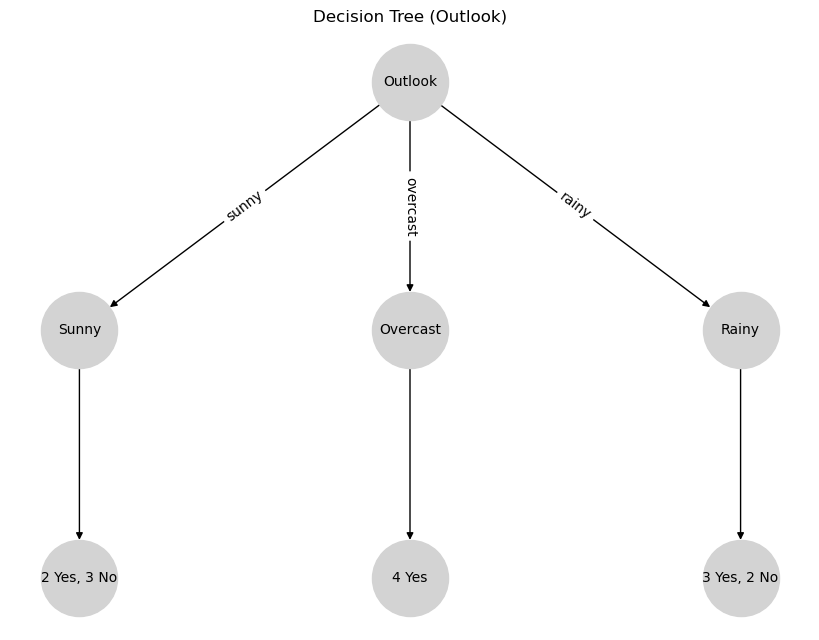

In [30]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes (decision tree structure)
G.add_node("Outlook", shape="circle", color="gray")
G.add_node("Sunny", shape="ellipse")
G.add_node("Overcast", shape="ellipse")
G.add_node("Rainy", shape="ellipse")

# Add leaf nodes
G.add_node("SunnyLeaf", label="2 Yes, 3 No", shape="ellipse", color="lightgray")
G.add_node("OvercastLeaf", label="4 Yes", shape="ellipse", color="lightgray")
G.add_node("RainyLeaf", label="3 Yes, 2 No", shape="ellipse", color="lightgray")

# Add edges
G.add_edges_from([
    ("Outlook", "Sunny", {"label": "sunny"}),
    ("Outlook", "Overcast", {"label": "overcast"}),
    ("Outlook", "Rainy", {"label": "rainy"}),
    ("Sunny", "SunnyLeaf"),
    ("Overcast", "OvercastLeaf"),
    ("Rainy", "RainyLeaf"),
])

# Draw the graph
plt.figure(figsize=(8, 6))
pos = {
    "Outlook": (0, 3),
    "Sunny": (-2, 2),
    "Overcast": (0, 2),
    "Rainy": (2, 2),
    "SunnyLeaf": (-2, 1),
    "OvercastLeaf": (0, 1),
    "RainyLeaf": (2, 1),
}

labels = {node: G.nodes[node].get("label", node) for node in G.nodes}
edge_labels = {(u, v): d["label"] for u, v, d in G.edges(data=True) if "label" in d}

nx.draw(G, pos, with_labels=True, labels=labels, node_size=3000, node_color="lightgray", font_size=10, edge_color="black")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Decision Tree (Outlook)")
plt.show()


In [19]:
entropy_and_infogain(df, 'outlook')

,outlook,play
0,sunny,no
1,sunny,no
7,sunny,no
8,sunny,yes
10,sunny,yes


Entropy of outlook - sunny = 0.971


,outlook,play
2,overcast,yes
6,overcast,yes
11,overcast,yes
12,overcast,yes


Entropy of outlook - overcast = 0.0


,outlook,play
3,rainy,yes
4,rainy,yes
5,rainy,no
9,rainy,yes
13,rainy,no


Entropy of outlook - rainy = 0.971
Information Gain for outlook = 0.246


In [20]:
entropy_and_infogain(df, 'temp')

,temp,play
0,hot,no
1,hot,no
2,hot,yes
12,hot,yes


Entropy of temp - hot = 1.0


,temp,play
3,mild,yes
7,mild,no
9,mild,yes
10,mild,yes
11,mild,yes
13,mild,no


Entropy of temp - mild = 0.918


,temp,play
4,cool,yes
5,cool,no
6,cool,yes
8,cool,yes


Entropy of temp - cool = 0.811
Information Gain for temp = 0.029


In [21]:
entropy_and_infogain(df, 'humidity')

,humidity,play
0,high,no
1,high,no
2,high,yes
3,high,yes
7,high,no
11,high,yes
13,high,no


Entropy of humidity - high = 0.985


,humidity,play
4,normal,yes
5,normal,no
6,normal,yes
8,normal,yes
9,normal,yes
10,normal,yes
12,normal,yes


Entropy of humidity - normal = 0.592
Information Gain for humidity = 0.151


In [22]:
entropy_and_infogain(df, 'windy')

,windy,play
0,False,no
2,False,yes
3,False,yes
4,False,yes
7,False,no
8,False,yes
9,False,yes
12,False,yes


Entropy of windy - False = 0.811


,windy,play
1,True,no
5,True,no
6,True,yes
10,True,yes
11,True,yes
13,True,no


Entropy of windy - True = 1.0
Information Gain for windy = 0.048


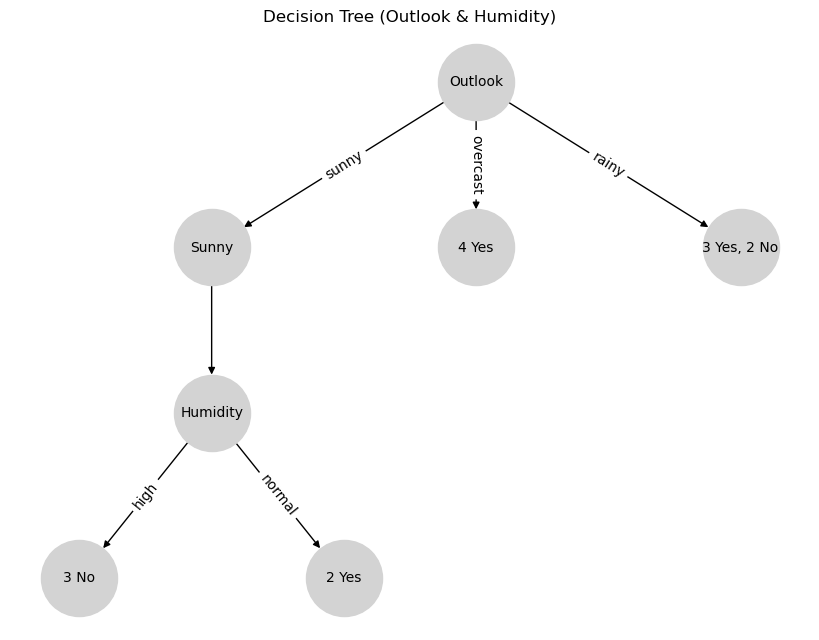

In [31]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add main decision node
G.add_node("Outlook", shape="circle", color="gray")

# Add first-level branches
G.add_node("Sunny", shape="ellipse")
G.add_node("Overcast", label="4 Yes", shape="ellipse", color="lightgray")
G.add_node("Rainy", label="3 Yes, 2 No", shape="ellipse", color="lightgray")

# Add second-level decision node for "Sunny"
G.add_node("Humidity", shape="circle", color="gray")

# Add leaf nodes for "Humidity"
G.add_node("High", label="3 No", shape="ellipse", color="lightgray")
G.add_node("Normal", label="2 Yes", shape="ellipse", color="lightgray")

# Add edges
G.add_edges_from([
    ("Outlook", "Sunny", {"label": "sunny"}),
    ("Outlook", "Overcast", {"label": "overcast"}),
    ("Outlook", "Rainy", {"label": "rainy"}),
    ("Sunny", "Humidity"),
    ("Humidity", "High", {"label": "high"}),
    ("Humidity", "Normal", {"label": "normal"}),
])

# Draw the graph
plt.figure(figsize=(8, 6))
pos = {
    "Outlook": (0, 3),
    "Sunny": (-2, 2),
    "Overcast": (0, 2),
    "Rainy": (2, 2),
    "Humidity": (-2, 1),
    "High": (-3, 0),
    "Normal": (-1, 0),
}

labels = {node: G.nodes[node].get("label", node) for node in G.nodes}
edge_labels = {(u, v): d["label"] for u, v, d in G.edges(data=True) if "label" in d}

nx.draw(G, pos, with_labels=True, labels=labels, node_size=3000, node_color="lightgray", font_size=10, edge_color="black")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Decision Tree (Outlook & Humidity)")
plt.show()


In [23]:
def split_data(data, feature, value):
    return data[data[feature] == value].reset_index(drop=True)

def build_tree_outlook(data):
    tree = {"outlook": {}}
    for value in data['outlook'].unique():
        subset = split_data(data, 'outlook', value)

        # Check if all rows in this subset have the same 'play' value
        if len(subset['play'].unique()) == 1:
            tree['outlook'][value] = subset['play'].unique()[0]  # Leaf node with the result (yes/no)
        else:
            # If it's still mixed, return majority class (for now, a simple approach)
            tree['outlook'][value] = subset['play'].value_counts().idxmax()

    return tree


decision_tree_outlook = build_tree_outlook(df)
print("Decision Tree Split on 'outlook':")
print(decision_tree_outlook)

Decision Tree Split on 'outlook':
{'outlook': {'sunny': 'no', 'overcast': 'yes', 'rainy': 'yes'}}


In [24]:
def count_outcomes(subset):
    yes_count = (subset['play'] == 'yes').sum()
    no_count = (subset['play'] == 'no').sum()
    return yes_count, no_count
def expanded_tree_outlook(data):
    tree = {"outlook": {}}
    for value in data['outlook'].unique():
        subset = split_data(data, 'outlook', value)
        yes_count, no_count = count_outcomes(subset)
        
        tree['outlook'][value] = f"{yes_count} yes and {no_count} no"

    return tree

detailed_outlook_tree = expanded_tree_outlook(df)
print("Decision Tree Split on 'outlook':")
for branch, outcome in detailed_outlook_tree['outlook'].items():
    print(f"For {branch}: {outcome}")

Decision Tree Split on 'outlook':
For sunny: 2 yes and 3 no
For overcast: 4 yes and 0 no
For rainy: 3 yes and 2 no


In [25]:
def display_outlook_subset(data, target_value='sunny'):
    subset = data[data['outlook'] == target_value]
    

    print(f"OUTLOOK - \"{target_value.upper()}\"\n")
    print(subset.to_string(index=False))


display_outlook_subset(df, 'sunny')

OUTLOOK - "SUNNY"

outlook temp humidity  windy play
  sunny  hot     high  False   no
  sunny  hot     high   True   no
  sunny mild     high  False   no
  sunny cool   normal  False  yes
  sunny mild   normal   True  yes


In [26]:
def entropy_sunny_subset(data):
    sunny_subset = data[data['outlook'] == 'sunny']
    return find_entropy(sunny_subset['play'])


sunny_entropy = entropy_sunny_subset(df)
print(f"Entropy for 'sunny' outlook: {sunny_entropy}")

Entropy for 'sunny' outlook: 0.971


In [27]:
def entropy_temp_in_sunny(data):
    sunny_subset = data[data['outlook'] == 'sunny']
    entropy_and_infogain(sunny_subset, 'temp')

entropy_temp_in_sunny(df)

,temp,play
0,hot,no
1,hot,no


Entropy of temp - hot = 0.0


,temp,play
7,mild,no
10,mild,yes


Entropy of temp - mild = 1.0


,temp,play
8,cool,yes


Entropy of temp - cool = 0.0
Information Gain for temp = 0.571


In [28]:
def entropy_humidity_in_sunny(data):
    sunny_subset = data[data['outlook'] == 'sunny']
    entropy_and_infogain(sunny_subset, 'humidity')

entropy_humidity_in_sunny(df)

,humidity,play
0,high,no
1,high,no
7,high,no


Entropy of humidity - high = 0.0


,humidity,play
8,normal,yes
10,normal,yes


Entropy of humidity - normal = 0.0
Information Gain for humidity = 0.971


In [29]:
def entropy_windy_in_sunny(data):
    sunny_subset = data[data['outlook'] == 'sunny']
    entropy_and_infogain(sunny_subset, 'windy')

entropy_windy_in_sunny(df)

,windy,play
0,False,no
7,False,no
8,False,yes


Entropy of windy - False = 0.918


,windy,play
1,True,no
10,True,yes


Entropy of windy - True = 1.0
Information Gain for windy = 0.02


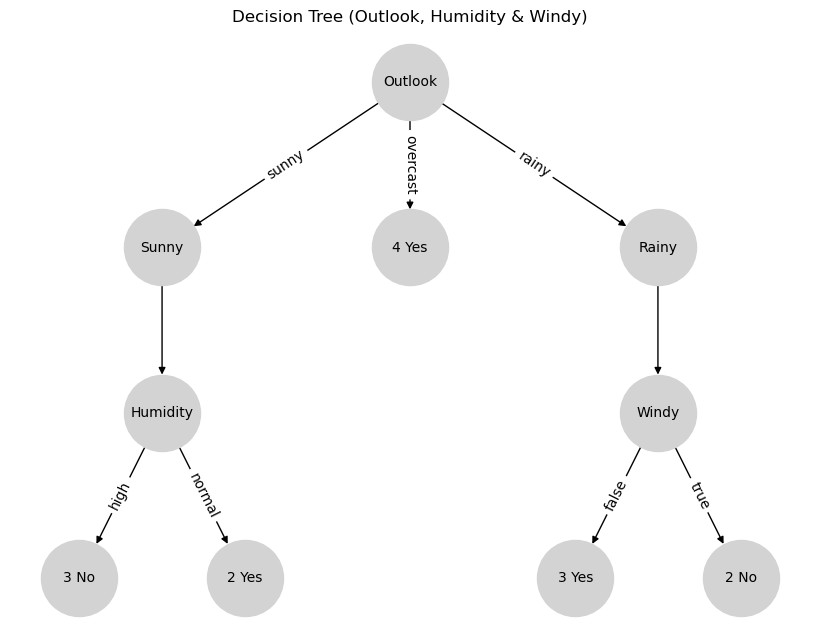

In [32]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add main decision node
G.add_node("Outlook", shape="circle", color="gray")

# Add first-level branches
G.add_node("Sunny", shape="ellipse")
G.add_node("Overcast", label="4 Yes", shape="ellipse", color="lightgray")
G.add_node("Rainy", shape="ellipse")

# Add second-level decision nodes
G.add_node("Humidity", shape="circle", color="gray")  # Decision under "Sunny"
G.add_node("Windy", shape="circle", color="gray")  # Decision under "Rainy"

# Add leaf nodes for "Humidity"
G.add_node("High", label="3 No", shape="ellipse", color="lightgray")
G.add_node("Normal", label="2 Yes", shape="ellipse", color="lightgray")

# Add leaf nodes for "Windy"
G.add_node("False", label="3 Yes", shape="ellipse", color="lightgray")
G.add_node("True", label="2 No", shape="ellipse", color="lightgray")

# Add edges
G.add_edges_from([
    ("Outlook", "Sunny", {"label": "sunny"}),
    ("Outlook", "Overcast", {"label": "overcast"}),
    ("Outlook", "Rainy", {"label": "rainy"}),
    ("Sunny", "Humidity"),
    ("Humidity", "High", {"label": "high"}),
    ("Humidity", "Normal", {"label": "normal"}),
    ("Rainy", "Windy"),
    ("Windy", "False", {"label": "false"}),
    ("Windy", "True", {"label": "true"}),
])

# Draw the graph
plt.figure(figsize=(8, 6))
pos = {
    "Outlook": (0, 3),
    "Sunny": (-3, 2),
    "Overcast": (0, 2),
    "Rainy": (3, 2),
    "Humidity": (-3, 1),
    "Windy": (3, 1),
    "High": (-4, 0),
    "Normal": (-2, 0),
    "False": (2, 0),
    "True": (4, 0),
}

labels = {node: G.nodes[node].get("label", node) for node in G.nodes}
edge_labels = {(u, v): d["label"] for u, v, d in G.edges(data=True) if "label" in d}

nx.draw(G, pos, with_labels=True, labels=labels, node_size=3000, node_color="lightgray", font_size=10, edge_color="black")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Decision Tree (Outlook, Humidity & Windy)")
plt.show()
